<a href="https://colab.research.google.com/github/rickycarrillo3/ML-Projects/blob/main/Linear_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will start by simply coding a 1D Linear Regressor


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
"""
A simple linear regressor
"""
class LinearRegressor():
    def __init__(self, weight, bias):
      self.weight = weight
      self.bias = bias

    def update_weight(self, new_weight):
      self.weight = new_weight

    def update_bias(self, new_bias):
      self.bias = new_bias

    def predict(self, x_val):
      return self.weight * x_val + self.bias


Text(0, 0.5, 'y')

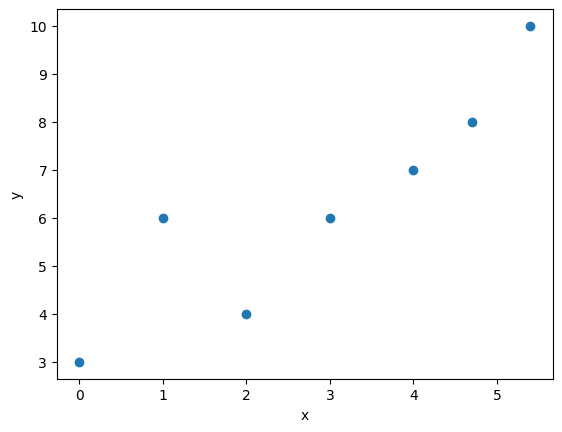

In [6]:
x_vals = [0,1,2,3,4,4.7,5.4]
y_vals = [3, 6, 4,6,7, 8, 10]
# Visualize our dataset
plt.scatter(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

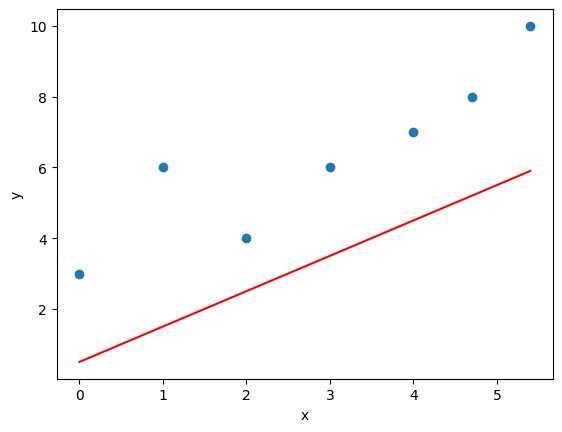

In [7]:
# Look at our initial regressor
weight = 1.0
bias = 0.5
our_line = LinearRegressor(weight, bias)
plt.plot(x_vals, [our_line.predict(x_val) for x_val in x_vals], color = 'red')
plt.scatter(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')

We want to find a line of "best fit" for this set of points.

But what does "best fit" even mean? We first need to define a notion of "fitness" which is going to be given by our loss function. For this first part, we will use the Mean Squared Loss function, given by $\frac{1}{n}\sum_{i = 1} ^n (f(x^{(i)}) - y^{i})^2$ where $f$ is our current linear regressor.

In [8]:
def compute_msl(x_vals, y_vals, linear_function: LinearRegressor):
  total_error = 0
  num_points = len(x_vals)
  for i in range(num_points):
    total_error += (linear_function.predict(x_vals[i]) - y_vals[i]) ** 2
  return total_error / num_points

## Current Mean Squared Loss ##
print(f'Current Mean Squared Loss: {compute_msl(x_vals, y_vals, our_line)}')

Current Mean Squared Loss: 9.414285714285713


That is quite the error ! Remember, the lower the error the better "fit" our line is. While we could sit and play around with the weight and bias for quite a bit, it would be even nicer if we could just automate this task.

First, remember that our linear regressor is a function $f(x) = wx + b$ where $w$ is the weight and $b$ is the bias. Let's look at how the Mean Squared Loss function changes as we change our parameters $w$ and $b$

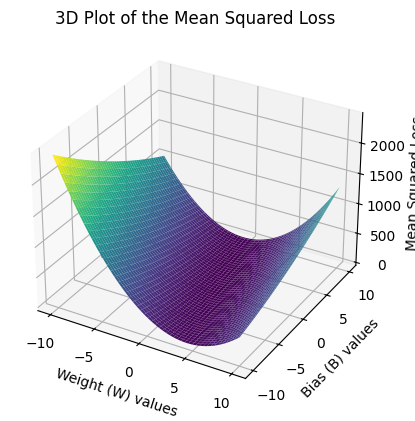

In [26]:
## Add 3D plot of w,b and the MSL ##
w_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w_vals, b_vals)

def msl_for_visual(w, b, x_vals, y_vals):
  linear_reg = LinearRegressor(w, b)
  return compute_msl(x_vals, y_vals, linear_reg)

msl_vals = msl_for_visual(W, B, x_vals, y_vals)
# Draw the 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, msl_vals, cmap='viridis') # 'viridis' is a common colormap

ax.set_xlabel('Weight (W) values')
ax.set_ylabel('Bias (B) values')
ax.set_zlabel('Mean Squared Loss')

plt.title('3D Plot of the Mean Squared Loss')
plt.show()

We can see that there is a point where the Mean Squared Loss is at a minimum. Perfect ! Now, we just need to find the $w$ and $b$ that give us such result. We can squint really hard and try to read the plot in order to get these values, or we could use the method of Gradient Descent.

The method of Gradient Descent helps us find minima of various function. In our case, the function of interest is the Mean Squared Loss. This method is iterative, which means it consists of verious steps that are repeated until a desired result is reached.

In the case of a single variable, in step $i + 1$, we compute the following

$x_{i + 1} = x_i - \alpha f'(x_i)$

where $x_i$ is our result from step $i$ and $\alpha$ is sort of a speeding up factor called the "learning rate" that helps speed up the process of reaching or converging to a minimum. The final result is a value $x$ so that $f(x)$ is a minimum of the function $f$.

With most functions, we will not exactly reach the minimum, so the process is stopped early when the change between consecutive steps is small enough, i.e,

$|x_i - x_{i + 1}| < ϵ$ for a select small number epsilon.


Let's see gradient descent in action with the function $f(x) = x^2$

Final value of x: 0.18014398509481985
Values of x in each iteration: [10, 8.0, 6.4, 5.12, 4.096, 3.2768, 2.62144, 2.0971520000000003, 1.6777216000000004, 1.3421772800000003, 1.0737418240000003, 0.8589934592000003, 0.6871947673600002, 0.5497558138880001, 0.43980465111040007, 0.35184372088832006, 0.281474976710656, 0.22517998136852482, 0.18014398509481985]


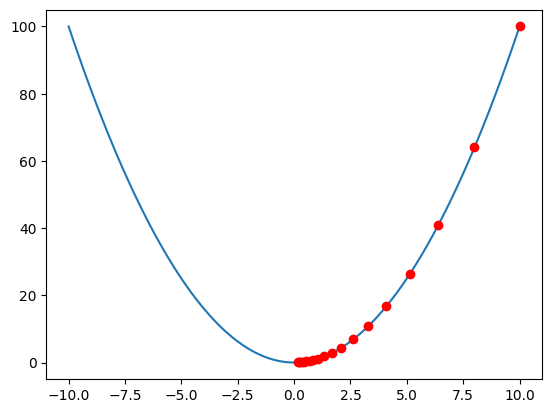

In [9]:
# Gradient Descent
def gradient_descent(f, initial_val, learning_rate, eps):
  process_vals = [float("inf"), initial_val]
  values_to_plot = [initial_val]
  while (abs(process_vals[0] - process_vals[1]) > eps):
    current_x = process_vals[1]
    last_x = process_vals[0]
    # Update the last value
    process_vals[0] = current_x
    # Compute Step
    process_vals[1] = current_x - learning_rate * 2 * current_x # Notice 2 * last_x (Derivative of x^2)
    # Add to list of plotting points
    values_to_plot.append(process_vals[1])
  return values_to_plot

f = lambda x: x ** 2
eps = 0.05
initial_val = 10
learning_rate = 0.1
values_to_plot = gradient_descent(f, initial_val, learning_rate, eps)
print(f'Final value of x: {values_to_plot[-1]}')
print(f'Values of x in each iteration: {values_to_plot}')
plt.plot(np.linspace(-10, 10, 100), [f(x) for x in np.linspace(-10, 10, 100)])
plt.plot(values_to_plot, [f(value) for value in values_to_plot] , 'o', color = 'red')

We can see that the red points start far from the minimum, but after just a few iterations, they converge at the minimum of our function $f(x) = x^2$

Back to our original problem, how do we use gradient descent to obtain a "best fitting" line?

Well, since we want to minimize the Mean Squared Loss function, we must then let $f(x)$ be the Mean Square Loss function. Similarly, notice we wanted to find the $x$ that minimized our function above. In our case, since $f(x) = wx + b$, we want to find the $w$ and $b$ that minimize our Mean Squared Loss function.


In [21]:
# Gradient descent for the Linear Regressor

def grad_msl(x_vals, y_vals, linear_regressor):
  n = len(x_vals)
  grad_w = 0
  grad_b = 0
  # Calculate each sum
  for i in range(n):
    grad_w += x_vals[i] * (linear_regressor.predict(x_vals[i]) -  y_vals[i])
    grad_b += linear_regressor.predict(x_vals[i]) - y_vals[i]

  grad_w *= (2 / n)
  grad_b *= (2 / n)
  return grad_w, grad_b

def full_grad_descent(x_vals, y_vals, linear_regressor, learning_rate=0.1, eps=0.001):
  epoch_counter = 0
  last_error = float("inf")
  while abs(last_error - compute_msl(x_vals, y_vals, linear_regressor)) > eps:
    epoch_counter += 1
    print(f'Epoch: {epoch_counter}, Current Error: {compute_msl(x_vals, y_vals, linear_regressor)}')
    print(f'Current Weight: {linear_regressor.weight}, Current Bias: {linear_regressor.bias}')
    # Update the last error
    last_error = compute_msl(x_vals, y_vals, linear_regressor)
    # Compute the gradient in terms of w, and b
    grad_w, grad_b = grad_msl(x_vals, y_vals, linear_regressor)
    # Update the weight and bias
    linear_regressor.update_weight(linear_regressor.weight - learning_rate * grad_w)
    linear_regressor.update_bias(linear_regressor.bias - learning_rate * grad_b)

  return linear_regressor


Epoch: 1, Current Error: 12.578571428571427
Current Weight: 1.0, Current Bias: 0.0
Epoch: 2, Current Error: 3.8572593622448967
Current Weight: 2.005, Current Bias: 0.3414285714285714
Epoch: 3, Current Error: 3.2573015599651205
Current Weight: 1.7454433673469387, Current Bias: 0.3601357142857143
Epoch: 4, Current Error: 3.106677387274258
Current Weight: 1.781786203717201, Current Bias: 0.45150197594752184
Epoch: 5, Current Error: 2.986883891196896
Current Weight: 1.7497102213090898, Current Bias: 0.5232960255711162
Epoch: 6, Current Error: 2.8747707453910647
Current Weight: 1.7342501413756184, Current Bias: 0.5971210594666801
Epoch: 7, Current Error: 2.7687535769103198
Current Weight: 1.7155364659177716, Current Bias: 0.6680028414964417
Epoch: 8, Current Error: 2.6684407544840356
Current Weight: 1.6981908234906655, Current Bias: 0.7371699435618374
Epoch: 9, Current Error: 2.573522069205322
Current Weight: 1.681117676716244, Current Bias: 0.8044010127461911
Epoch: 10, Current Error: 2.48

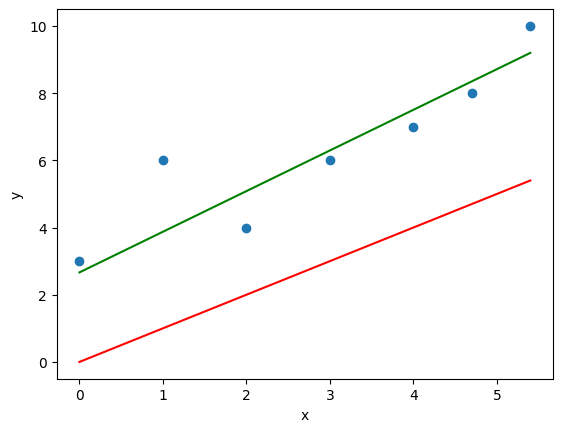

In [22]:
init_w = 1.0
init_b = 0.0
learning_rate = 0.05
eps = 0.005

# Plot initial line
our_line = LinearRegressor(init_w, init_b)
old_error = compute_msl(x_vals, y_vals, our_line)
plt.plot(x_vals, [our_line.predict(x_val) for x_val in x_vals], color = 'red')
plt.scatter(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
# Apply gradient descent until error small enough
final_line = full_grad_descent(x_vals, y_vals, our_line, learning_rate, eps)
final_error = compute_msl(x_vals, y_vals, final_line)
# Plot optimized line
plt.plot(x_vals, [final_line.predict(x) for x in x_vals], color = 'green')
print(f'Initial error: {old_error}, Final error: {final_error}')

Sweet ! We have found a way to optimize our linear regressor (find the "best fit" line) for our dataset ! We can play with other loss functions and initial values to obtain drastically different result, but those are topics for another time. Thanks for looking through this short intro to Linear Regression and Gradient Descent !